In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, mean_squared_error, roc_curve,auc

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
df_kepler=pd.read_csv("https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=cumulative&select=kepid,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr&format=csv")

In [ ]:
#limpieza
df_kepler_clean=df_kepler.dropna().reset_index(drop=True)

df=df_kepler_clean.drop(['kepid', 'kepoi_name'], axis=1)

In [ ]:
df=df[df['koi_disposition']!='CANDIDATE'].reset_index(drop=True)
df['koi_disposition'].unique()

array(['CONFIRMED', 'FALSE POSITIVE'], dtype=object)

In [ ]:
le=LabelEncoder()
df['koi_disposition']=le.fit_transform(df['koi_disposition'])

In [ ]:
X=df.drop('koi_disposition', axis=1).values
y=df['koi_disposition'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
scaler=StandardScaler()
X_train_scaled_1=scaler.fit_transform(X_train)
X_test_scaled_1=scaler.transform(X_test)

In [ ]:
lr=LogisticRegression()
lr.fit(X_train_scaled_1, y_train)

LogisticRegression()

In [ ]:
scores_1=cross_val_score(lr, X_train_scaled_1, y_train)
print(f'Logistic regression score={scores_1.mean()} +/- {scores_1.std()}')

Logistic regression score=0.8250083202586411 +/- 0.004652412258525451


In [ ]:
y_predict_1=lr.predict(X_test_scaled_1)

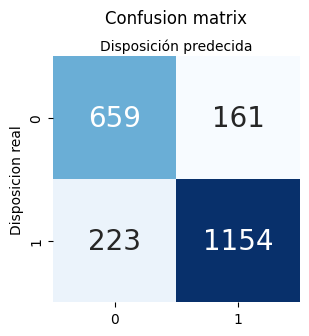

In [ ]:
#Matriz de confusión

class_names=[0,0]
fig,ax=plt.subplots(figsize=(3,3))
tick_marks=(np.arange(len(class_names)))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_predict_1)), annot=True, cmap='Blues', fmt='g', cbar=False, annot_kws={'size':20})
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Disposicion real')
plt.xlabel('Disposición predecida')
plt.show()



In [ ]:
#Metricas
print(f'Precision={precision_score(y_test, y_predict_1)}')
print(f'Exactitud={accuracy_score(y_test, y_predict_1)}')
print(f'Recall={recall_score(y_test, y_predict_1)}')



Precision=0.8775665399239544
Exactitud=0.8252162039144287
Recall=0.8380537400145244
